In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from numpy.random import beta

## Iris dataset

Vamos usar o teorema de Bayes aplicado no Gaussian Naive Bayes, um classificador simples que se baseia no teorema. Para isso, usaremos os dados do dataset Iris, que possui uma amostra de 150 observações de três espécies diferentes de flores, separadas em três grupos (0, 1 e 2). Cada observação possui 4 dados sobre a flor: comprimento e largura das pétalas e comprimeiro e largura das sépalas. Com esses 4 dados e a categoria de cada flor, podemos rodar nosso classificados. Começamos fazendo uma análise descritiva breve das informações:

In [2]:
dados = load_iris(as_frame = True)['data']
dados['type'] = load_iris(as_frame = True )['target']

dados.groupby('type').describe()['sepal length (cm)']

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
1,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
2,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [3]:
dados.groupby('type').describe()['petal width (cm)']

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,50.0,0.246,0.105386,0.1,0.2,0.2,0.3,0.6
1,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
2,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


Aqui podemos ver que as médias e as medianas dessas duas características (comprimento da sépala e largura da pétala) são, de fato, bastante distintas, o que facilita nosso uso no classificador.

Agora usamos o train test split para separar nossos dados em dois grupos: treino e teste. Cada grupo é, por sua vez, separado em outros dois (X, os as variáveis observadas, e y, ou a categoria da planta). Definimos que o grupo de teste possuirá 30% dos dados.

In [4]:
X = load_iris(as_frame = True)['data']
y = load_iris(as_frame = True)['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Aqui instanciamos a classe GaussianNB, que é o classificador que será usado. Após fazer esse processo, precisamos treiná-lo com nossos dados de treino (o que é feito com a função fit usando como parâmetro os dados de treino) e depois rodamos a função predict com o objetivo de testar o classificador. Nessa parte usamos os dados de teste para verificar se está funcionando. Assim, o classificador gerará um conjunto de dados que ele acredita ser correto a parte dos dados de teste (X_test) e, posteriormente, compararemos esses dados (y_pred) com os dados reais (y_test).

In [5]:
gnb = GaussianNB()

gnb_treinado = gnb.fit(X_train, y_train)

y_pred = gnb_treinado.predict(X_test)

total_de_casos = X_test.shape[0]
total_de_erros = (y_test != y_pred).sum()
taxa = round(1 - (total_de_erros / total_de_casos), 2) * 100

print("Número de casos: {0}\nNúmero de erros: {1}\nTaxa de acerto: {2}%".format(total_de_casos, total_de_erros, taxa))

Número de casos: 45
Número de erros: 0
Taxa de acerto: 100.0%


Podemos ver aqui que a taxa de acerto foi consideravelmente alta, mesmo com um algoritmo super simples como o GaussianNB

## Thompson Sampling

Esse algoritmo é do tipo MAB, ou Multi Armed Bandit. Ele tem por objetivo maximizar os ganhos em cada escolha feita, dado que existem muitas escolhas possíveis. Além disso ele é um algoritmo de aprendizagem reforçada que utiliza o modelo Bayesiano para tomar decisões. Além disso, ele combina uma distribuição de Bernoulli na decisão a priori e a distribuição beta na decisão a posteriori.

**Exemplo**:

Suponha um site de notícias que quer lançar uma matéria mas não sabe qual título usar. Para decidir, ele criou 4 títulos e quer saber qual gerará mais cliques. Inicialmente, teremos uma distribuição beta que utiliza dois parâmetros: alfa e beta. No nosso caso, alfa (ou a) será a quantidade de sucessos daquela manchete e beta (ou b) será a quantidade de fracassos.

No começo, como não temos cliques para serem medidos, todas as manchetes possíveis possuem os mesmos parâmetros alfa e beta. Desse modo, ao rodarmos o algoritmo da distribuição beta, todos os títulos podem ser clicados com igual probabilidade.

In [6]:
titulo_1_a = 0 + 1
titulo_1_b = 0 + 1

titulo_2_a = 0 + 1
titulo_2_b = 0 + 1

titulo_3_a = 0 + 1
titulo_3_b = 0 + 1

titulo_4_a = 0 + 1
titulo_4_b = 0 + 1

t1 = beta(a = titulo_1_a, b = titulo_1_b, size = 1)
t2 = beta(a = titulo_2_a, b = titulo_2_b, size = 1)
t3 = beta(a = titulo_3_a, b = titulo_3_b, size = 1)
t4 = beta(a = titulo_4_a, b = titulo_4_b, size = 1)

print("Resultado para o título 1: {}\n\
Resultado para o título 2: {}\n\
Resultado para o título 3: {}\n\
Resultado para o título 4: {}".format(t1, t2, t3, t4))

Resultado para o título 1: [0.35594554]
Resultado para o título 2: [0.52951155]
Resultado para o título 3: [0.5274137]
Resultado para o título 4: [0.35113639]


Ao final de um tempo de teste, obtivemos alguns números para cada um dos títulos possíveis. Esses dados, agora, serão usados como os parâmetros alfa e beta da nossa distribuição. O algoritmo roda novamente e, com isso, obtemos qual das manchetes são mais eficientes.

In [7]:
titulo_1_a = 1000 + 1
titulo_1_b = 5000 + 1

titulo_2_a = 987 + 1
titulo_2_b = 4763 + 1

titulo_3_a = 1563 + 1
titulo_3_b = 7580 + 1

titulo_4_a = 804 + 1
titulo_4_b = 4503 + 1

t1 = beta(a = titulo_1_a, b = titulo_1_b, size = 1)
t2 = beta(a = titulo_2_a, b = titulo_2_b, size = 1)
t3 = beta(a = titulo_3_a, b = titulo_3_b, size = 1)
t4 = beta(a = titulo_4_a, b = titulo_4_b, size = 1)

print("Resultado para o título 1: {}\n\
Resultado para o título 2: {}\n\
Resultado para o título 3: {}\n\
Resultado para o título 4: {}".format(t1, t2, t3, t4))

Resultado para o título 1: [0.17346455]
Resultado para o título 2: [0.1766303]
Resultado para o título 3: [0.17268207]
Resultado para o título 4: [0.14793197]


Após rodar esse algoritmo várias vezes, vemos que os títulos 2 e 3 são os mais eficientes em média.

## Cadeias de Markov

Uma cadeia de Markov é um modelo estatístico onde o próximo evento da cadeia depende somente do estado atual do sistema observado.

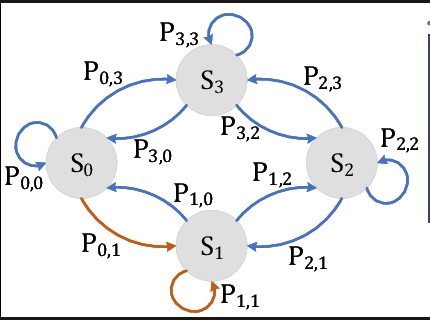

Nessa imagem, vemos que os estados possíveis S0, S1, S2 e S3 são acessíveis a partir dos outros estados ou a partir de si mesmos. Porém, a probabilidade de cada estado se alterar para o outro é um valor fixo que, portanto, não depende do estado anterior. Ou seja, de S1 para S2, por exemplo, a probabilidade é fixa, e não depende se antes de S1 estava no estado S0, S1, S2 ou S3.

**Exemplo**:

Um funcionário precisa escolher em qual restaurante irá comer amanhã. Isso é determinado por qual restaurante ele comeu hoje, sendo que ele tem 73% de comer no restaurante A dado que ele comeu hoje no restaurante B e 85% de chance de comer no B dado que ele comeu no A hoje.

Além disso, sabemos que existe uma probabilidade de 58% de se almoçar no restaurante A hoje e 42% de se almoçar no restaurante B. Assim, qual a chance de se almoçar no restaurante A amanhã?

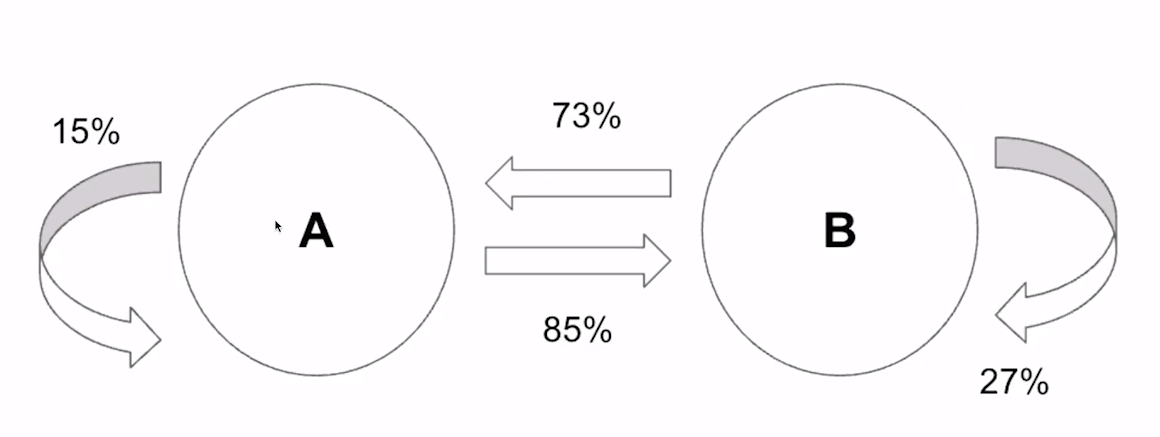

In [8]:
p_A_amanha_dado_B_hoje = 0.73
p_B_amanha_dado_B_hoje = 0.27

p_B_amanha_dado_A_hoje = 0.85
p_A_amanha_dado_A_hoje = 0.15

p_A = 0.58
p_B = 0.42

Utlizando o teorema de Bayes para calcular as chances de comer amanhã em cada um dos restaurantes:

In [9]:
p_A_amanha = ((p_A * p_A_amanha_dado_A_hoje) + (p_B * p_A_amanha_dado_B_hoje)) * 100
p_B_amanha = ((p_A * p_B_amanha_dado_A_hoje) + (p_B * p_B_amanha_dado_B_hoje)) * 100

print('Probabilidade de comer no A amanhã: {}%\nProbabilidade de comer no B amanhã: {}%'.format(round(p_B_amanha, 3), round(p_A_amanha, 3)))

Probabilidade de comer no A amanhã: 60.64%
Probabilidade de comer no B amanhã: 39.36%


E qual a probabilidade de comer no B ou no A daqui 10 dias?

Podemos começar com uma matriz onde temos os 4 termos:

[Comer no A amanhã dado que comeu no A hoje; comer no B amanhã dado que comeu no A hoje

Comer no B amanhã dado que comeu no B hoje; Comer no B amanhã dado que comeu no B hoje]

Para calcular essas probabilidades com N dias no futuro, podemos elevar essa matrix a N + 1

In [10]:
hoje = np.array([
    [0.15, 0.85],
    [0.73, 0.27]
])

nove_dias_a_frente = np.linalg.matrix_power(hoje, 10)
nove_dias_a_frente

array([[0.46434293, 0.53565707],
       [0.46003489, 0.53996511]])

Agora redefiniremos as probabilidades a priori (ou seja, as probabilidades de se comer no A e no B hoje) e multiplicaremos essa matriz a priori pela matriz de possibilidades daqui a nove dias

In [11]:
priori = np.array([ [0.42], [0.58]])

daqui_a_dez_dias = np.matmul(nove_dias_a_frente, priori)

daqui_a_dez_dias

array([[0.50570513],
       [0.50639442]])